## Information about Dataset

Private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns.
**In our analysis, we will try to answer following questions:**
* Which unicorn companies have had the biggest return on investment?
* How long does it usually take for a company to become a unicorn? Has it always been this way?
* What's the trend over time in the companies that became unicorns in the year2021 and the difference between the previous year?
* How many companis that joined unicorn per week?
* What's the most popular industry, and where are they located?

### Step 1: Import relevant libraries and modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/lexicai/Downloads/archive/Unicorn_Companies.csv")

### Step 2: Data Exploration
* To begin, display the first 5 rows of the data to get an understanding of how the dataset is structured.

In [3]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
rows, columns = df.shape
print(f"The dataset has {rows} rows in total.")
print(f"The dataset has {columns} columns in total.")

The dataset has 1074 rows in total.
The dataset has 10 columns in total.


The information above indicates that there are 1074 unicorn companies on the March 2022 and shows 10 aspects of each company.

### Step 3: Data cleaning

### Check Missing values

In [5]:
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

There is a single missing value in the `Select Investors` column and 16 missing `cities`. There are no missing values in other columns.

### Review rows with missing values

In [6]:
# Filter the DataFrame to only include rows with at least one missing value.

df_row_missing = df[df.isna().any(axis=1)]
df_row_missing

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."


### Drop mising values

In [7]:
# Drop rows with missing value

df.dropna().size

10570

In [8]:
# Drop columns with missing value

df.dropna(axis=1).size

8592

In [9]:
# Original total element

df.size

10740

### Select a way of dropping missing values

In [10]:
print(f"If we drop rows, there are {round(10570/10740*100,2)}% data left.")
print(f"If we drop columns, there are {round(8592/10740*100,2)}% data left.")

If we drop rows, there are 98.42% data left.
If we drop columns, there are 80.0% data left.


The percentage removed was significantly higher for `columns` than it was for `rows`. Since both approaches result in a dataset with no missing values, it might be best to use the way that leaves the most data intact.

In [11]:
# Drop the missing values and store in the dataframe

df.dropna(inplace=True)

### Check Dataset after dropping missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1057 non-null   object
 1   Valuation         1057 non-null   object
 2   Date Joined       1057 non-null   object
 3   Industry          1057 non-null   object
 4   City              1057 non-null   object
 5   Country           1057 non-null   object
 6   Continent         1057 non-null   object
 7   Year Founded      1057 non-null   int64 
 8   Funding           1057 non-null   object
 9   Select Investors  1057 non-null   object
dtypes: int64(1), object(9)
memory usage: 90.8+ KB


From the information shown above, except the column `Year Founded` is `int64`, other columns are all objects, so we need to do **data conversion**.

### Data Conversion
* Valuation
* Date Joined

In [13]:
# Convert "Valuation"
df["Valuation"] = df["Valuation"].str.strip("$B").astype(int)

# Convert "Date Joined"
df["Date Joined"] = pd.to_datetime(df["Date Joined"])

In [14]:
# Check the dataset again to ensure conversion works

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1057 non-null   object        
 1   Valuation         1057 non-null   int64         
 2   Date Joined       1057 non-null   datetime64[ns]
 3   Industry          1057 non-null   object        
 4   City              1057 non-null   object        
 5   Country           1057 non-null   object        
 6   Continent         1057 non-null   object        
 7   Year Founded      1057 non-null   int64         
 8   Funding           1057 non-null   object        
 9   Select Investors  1057 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 90.8+ KB


**To Compare the years of each company take to become unicorn, we also need to extract `years` from 'Date Joined' from dataset.**

In [15]:
# Extract years

df["Year Joined"] = df["Date Joined"].dt.year

In [16]:
# Check if "Year Joined" has been created

df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


### Input Validation
* To check if there are some issues with data, such as duplication, invalid numbers or misspelling.

In [17]:
# Check "Years to join"

df["Years to join"] = df["Year Joined"] - df["Year Founded"]
df["Years to join"].sort_values().head()

714    -4
314     0
396     0
161     0
1001    0
Name: Years to join, dtype: int64

**It is obvious that a company cannot take negative years to become a unicorn, so we need to remove this row from dataset.**

In [33]:
# Drop row with wrong information

df.drop(labels=714,axis=0, inplace=True)

In [21]:
# Check spelling in 'Industry'

print(df["Industry"].unique())
print(df["Industry"].nunique())
# 'Artificial intelligence' and 'Artificial Intelligence' should be corrected

['Artificial intelligence' 'Other' 'E-commerce & direct-to-consumer'
 'Fintech' 'Internet software & services'
 'Supply chain, logistics, & delivery' 'Consumer & retail'
 'Data management & analytics' 'Edtech' 'Health' 'Hardware'
 'Auto & transportation' 'Travel' 'Cybersecurity'
 'Mobile & telecommunications' 'Artificial Intelligence']
16


In [23]:
# Rename the misspelled Industry label

df["Industry"] = df["Industry"].replace("Artificial Intelligence","Artificial intelligence")
print(df["Industry"].nunique())

15


In [24]:
# Check and Remove duplicated Company

# Calculate the number of duplicated companies before cleaning
print('Number of duplicated companies (before cleaning):')
print(df['Company'].duplicated().sum())

# Remove duplicate rows in the Company column
df.drop_duplicates(subset=['Company'], inplace = True)

# Calculate the number of duplicated companies after cleaning
print('')
print('Number of duplicated companies (after cleaning):')
print(df['Company'].duplicated().sum())

Number of duplicated companies (before cleaning):
1

Number of duplicated companies (after cleaning):
0


### Q1: How many companies in this dataset were founded each year?

In [34]:
df["Year Founded"].value_counts().sort_values(ascending=False)

2015    151
2016    109
2014    106
2012     94
2013     85
2011     81
2017     74
2018     59
2019     44
2010     39
2009     34
2008     27
2020     24
2007     23
2006     15
2005     14
2000     11
2021     10
2001      9
2003      8
2004      8
1999      8
1998      5
2002      4
1995      2
1994      2
1996      1
1919      1
1979      1
1992      1
1991      1
1990      1
1984      1
1993      1
1997      1
Name: Year Founded, dtype: int64

It has indicated that `2015` has the **highest count**, which means that `2015` is the year when the largest number of unicorn companies were found.

### Q2: How long does it usually take for a company to become a unicorn? 

In [35]:
print(f'On average, it took {round(df["Years to join"].mean(),2)} years for a company to become a unicorn.')

On average, it took 7.03 years for a company to become a unicorn.


### Q2(1): Describe it in a more detail

In [38]:
# Create a new DF to show how many years would take a company to become a unicorn

df_unicorn = df.groupby("Years to join")["Company"].count().reset_index().rename(columns={"Company":"Company Number"})
df_unicorn.sort_values("Years to join",ascending=False).head()

,Years to join,Company Number
29,98,1
28,37,2
27,28,1
26,27,2
25,26,1


### Visualize it in Scatter and boxplot

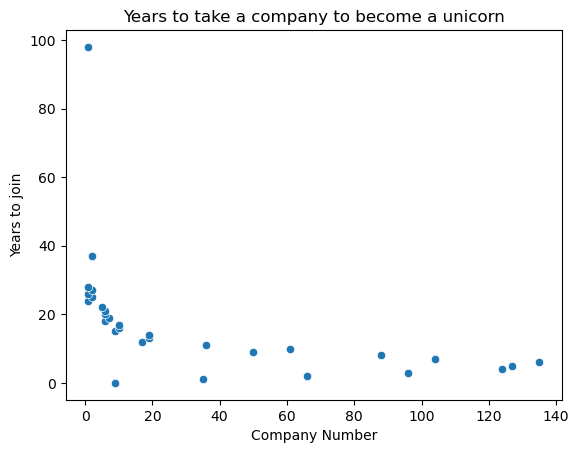

In [39]:
sns.scatterplot(data=df_unicorn, 
                x=df_unicorn["Company Number"],
                y=df_unicorn["Years to join"])
plt.title("Years to take a company to become a unicorn")
plt.show()

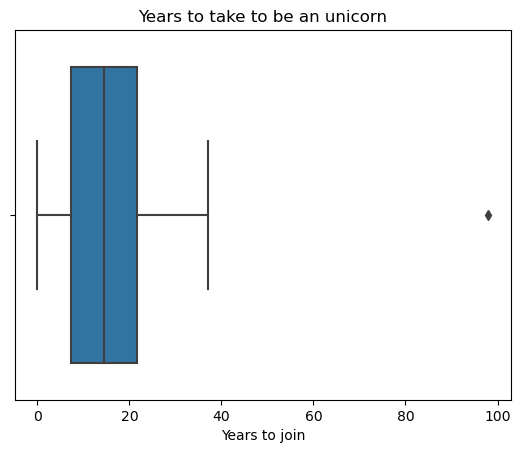

In [40]:
sns.boxplot(data=df_unicorn,
            x=df_unicorn["Years to join"])
g = plt.gca()
plt.title("Years to take to be an unicorn")
plt.show()

In [41]:
# Calculate 25th percentile of 'Years to join'
percentile25 = df_unicorn["Years to join"].quantile(0.25)

# Calculate 75th percentile of "Years to join"
percentile75 = df_unicorn["Years to join"].quantile(0.75)

# Calculate interquatile range
iqr = percentile75-percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print(f"Upper limit is: {upper_limit}.")

Upper limit is: 43.5.


After finding the Upper limit is 43.5, we can conclude that any company that takes more than 43.5 years to become a unicorn is unacceptable, which is seen as an outlier. We will remove the outliers and calculate the average years for a company to become an unicorn again.

In [42]:
# Average years to take for a company to be an unicorn after filtering outliners

df_unicorn[df_unicorn<=upper_limit]["Years to join"].mean()

14.482758620689655

### Q3: What structuring approach would you take to observe trends over time in the companies that became unicorns in the year 2021?

* To observe the trends over year 2021, we choose to split the year into weeks, and found how many companies were found each week in 2021.

In [45]:
# Create a new DataFrame for 2021
unicorn_2021 = df[df["Date Joined"].dt.year == 2021]

# Create a column "Week Joined" in unicorn_2021
unicorn_2021.insert(3,"Week Joined",unicorn_2021["Date Joined"].dt.strftime("%Y-W%V"))

# Group "unicorn_2021" by "week Joined"
# Use count() to find out how many unicorn were founded per week
unicorn_by_week = unicorn_2021.groupby("Week Joined")["Company"].agg("count").reset_index().rename(columns={"Company":"Company Count"})
unicorn_by_week.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


### Q4: Compare the trends with the previous year
* To do with, we also need to find out the trends for year 2020 by extracting weeks from years.
* Concat dataframe of 2020 and dataframe 0f 2021.

In [46]:
# Create a new DataFrame for 2021
unicorn_2020 = df[df["Date Joined"].dt.year == 2020]

# Create a column "Week Joined" in unicorn_2021
unicorn_2020.insert(3,"Week Joined",unicorn_2020["Date Joined"].dt.strftime("%Y-W%V"))

# Group "unicorn_2021" by "week Joined"
# Use count() to find out how many unicorn were founded per week
unicorn_by_week_2020 = unicorn_2020.groupby("Week Joined")["Company"].agg("count").reset_index().rename(columns={"Company":"Company Count"})
unicorn_by_week_2020.head()

,Week Joined,Company Count
0,2020-W01,1
1,2020-W02,2
2,2020-W04,4
3,2020-W05,3
4,2020-W06,1


In [47]:
# Concat two dataframes 

unicorn_by_week_2020_2021 = pd.concat([unicorn_by_week_2020,unicorn_by_week])
unicorn_by_week_2020_2021.sort_values("Company Count", ascending = False).head(10)

,Week Joined,Company Count
36,2021-W37,18
11,2021-W12,15
27,2021-W28,14
29,2021-W30,13
23,2021-W24,13
19,2021-W20,13
47,2021-W48,13
39,2021-W40,12
25,2021-W26,12
0,2021-W01,12


The top 10 weeks when the largest amount of unicorn were founded was in year 2021. In 2021 week37, there were 19 unicorns.

### Q5: How would you structure the data to observe trends over time in the average valuation of companies that joined in 2021 and 2020?
* To compare the trends of average valuation of companies for two years, we choose to calculate the average valuation of companies per quarter for year2020 and year2021.

In [48]:
# Concat DF2021 and DF2020

unicorn_2020_2021 = pd.concat([unicorn_2020,unicorn_2021])
unicorn_2020_2021.head()

,Company,Valuation,Date Joined,Week Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Years to join
22,Genki Forest,15,2020-03-01,2020-W09,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",2020,4
23,goPuff,15,2020-10-08,2020-W41,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",2020,7
38,Xingsheng Selected,12,2020-07-22,2020-W30,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",2020,11
54,Figma,10,2020-04-30,2020-W18,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",2020,8
57,Notion Labs,10,2020-04-01,2020-W14,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",2020,4


In [49]:
# Check if there any columns need to be converted before next step

unicorn_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 22 to 1072
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           613 non-null    object        
 1   Valuation         613 non-null    int64         
 2   Date Joined       613 non-null    datetime64[ns]
 3   Week Joined       613 non-null    object        
 4   Industry          613 non-null    object        
 5   City              613 non-null    object        
 6   Country           613 non-null    object        
 7   Continent         613 non-null    object        
 8   Year Founded      613 non-null    int64         
 9   Funding           613 non-null    object        
 10  Select Investors  613 non-null    object        
 11  Year Joined       613 non-null    int64         
 12  Years to join     613 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 67.0+ KB


In [50]:
# Create a new column "Quarter Joined"

unicorn_2020_2021["Quarter Joined"] = unicorn_2020_2021["Date Joined"].dt.to_period("Q").dt.strftime("%Y-Q%q")
unicorn_2020_2021.head()

,Company,Valuation,Date Joined,Week Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Years to join,Quarter Joined
22,Genki Forest,15,2020-03-01,2020-W09,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",2020,4,2020-Q1
23,goPuff,15,2020-10-08,2020-W41,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",2020,7,2020-Q4
38,Xingsheng Selected,12,2020-07-22,2020-W30,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",2020,11,2020-Q3
54,Figma,10,2020-04-30,2020-W18,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",2020,8,2020-Q2
57,Notion Labs,10,2020-04-01,2020-W14,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",2020,4,2020-Q2


In [51]:
# Calculate average "Valuation" based on "Quarter Joined"

unicorn_2020_2021_byquarter = unicorn_2020_2021.groupby("Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})
unicorn_2020_2021_byquarter

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.764706
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.766355
5,2021-Q2,2.350000
6,2021-Q3,2.102362
7,2021-Q4,1.787879


### Visualize the time it took companies to reach unicorn

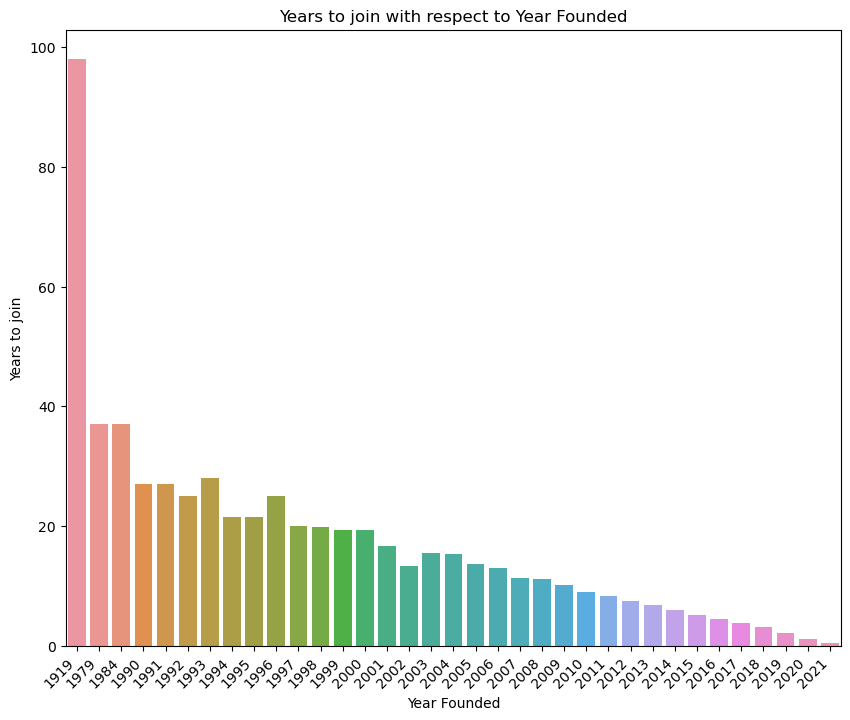

In [52]:
plt.figure(figsize=(10,8))

# Create bar plot to visualize the average number of years to it took companies to reach unicorn status
sns.barplot(x=df["Year Founded"],y=df["Years to join"], ci=False)

# Create titke
plt.title("Years to join with respect to Year Founded")

plt.xlabel("Year Founded")
plt.ylabel("Years to join")
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

There appears to be a trend wherein *companies that were founded later took less time to reach unicorn status*, on average. This is **biased**—a bias that is common in time data—because companies founded in later years have been around for less time. Therefore, there is less time to collect data on such companies compared to companies founded in earlier years).

### Visualize the number of companies that joined per week
* We will only visualize the number of companies that joined per week in 2021, as it's most recent year, which could reveal the similar trends in 2022.

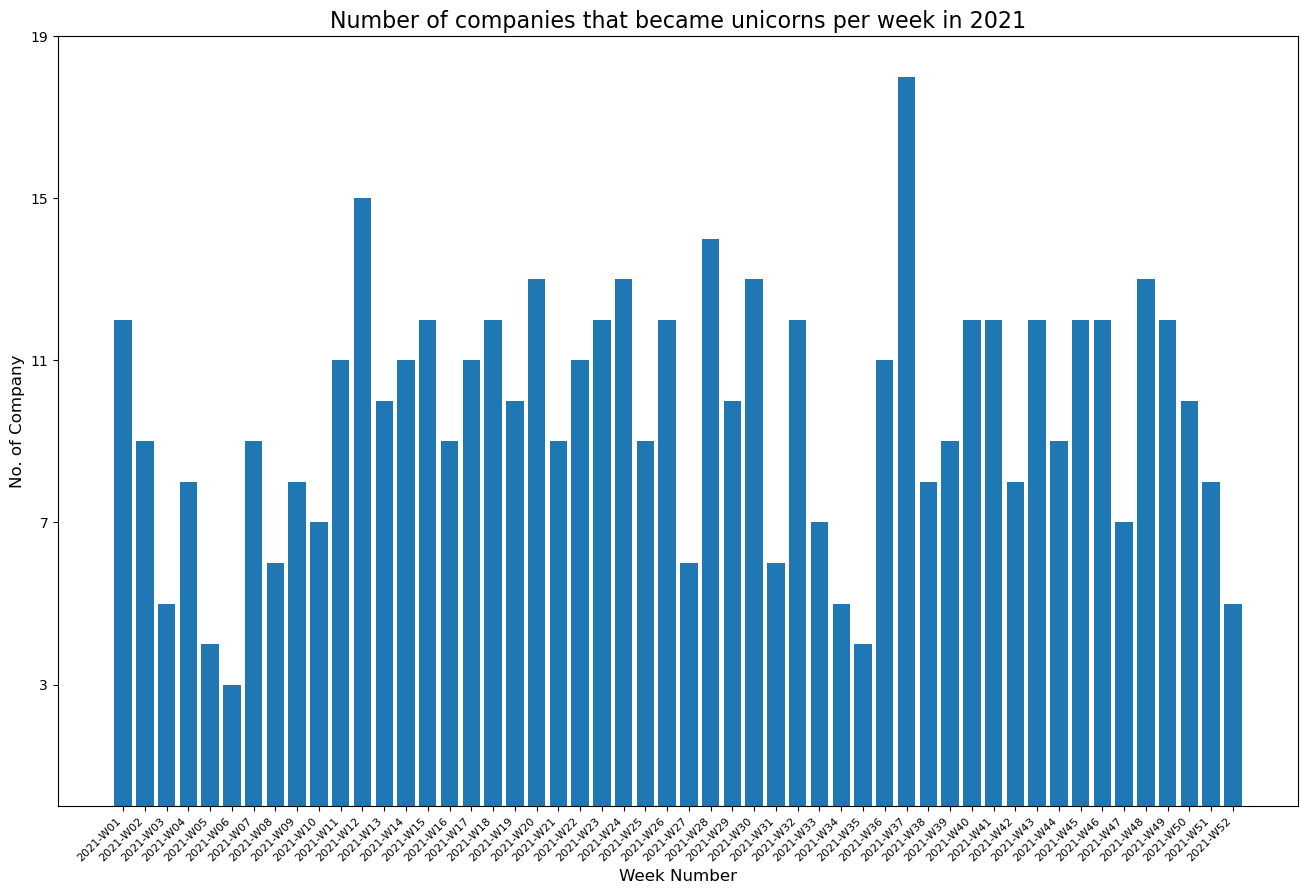

In [53]:
plt.figure(figsize=(16,10))

plt.bar(x=unicorn_by_week["Week Joined"], height=unicorn_by_week["Company Count"])

plt.title("Number of companies that became unicorns per week in 2021",fontsize=16)
plt.xlabel("Week Number", fontsize=12)
plt.ylabel("No. of Company",fontsize=12)
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)
y = np.arange(3,21,4)
plt.yticks(y)
plt.show()

- **Observations from a bar plot of the number of companies that became unicorns per week in 2021:**

  - The number of companies that joined unicorn status fluctuated over the weeks of 2021, with a trend of decline followed by increase occurring periodically.
  - The highest number of companies reached $1 billion valuation in `Week 37 of 2021`, which corresponds to `the third week of September 2021`. 
  - The weeks in 2021 with the next highest number of companies becoming unicorns are `Week 12` (which corresponds to `the fourth week of March`) and `Week 28` (which corresponds to `the third week of July`). 

### Visualize the average valuation over the quarters in 2020 and 2021

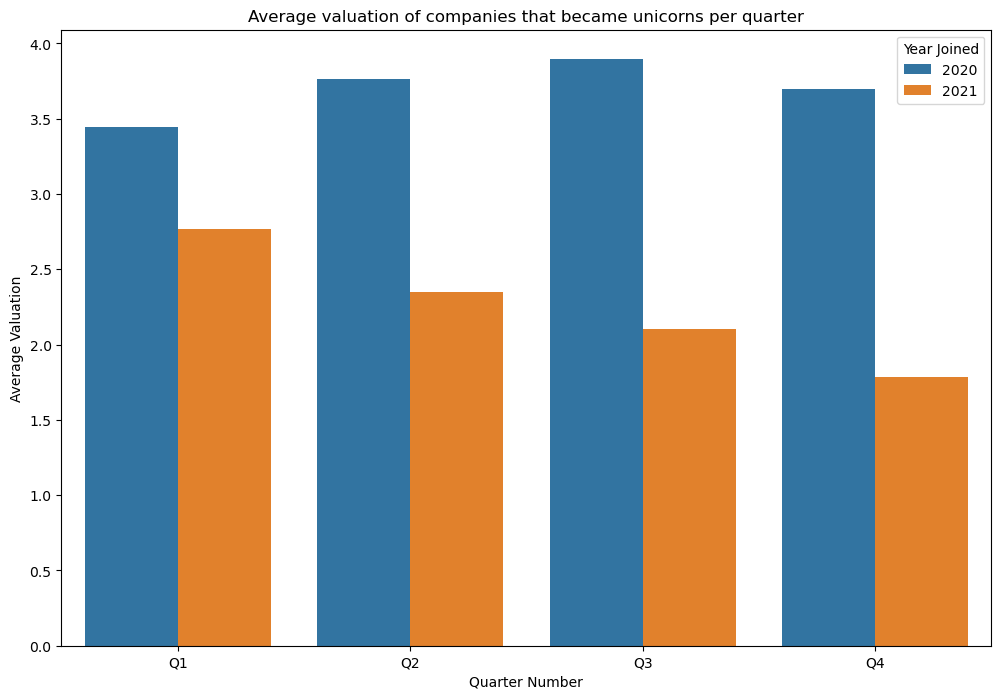

In [54]:
unicorn_2020_2021_byquarter["Quarter Number"] = unicorn_2020_2021_byquarter["Quarter Joined"].str[-2:]
unicorn_2020_2021_byquarter["Year Joined"] = unicorn_2020_2021_byquarter["Quarter Joined"].str[:4]

plt.figure(figsize=(12,8))

sns.barplot(x=unicorn_2020_2021_byquarter["Quarter Number"],
            y=unicorn_2020_2021_byquarter["Average Valuation"],
           hue=unicorn_2020_2021_byquarter["Year Joined"])
plt.xlabel("Quarter Number")
plt.ylabel("Average Valuation")
plt.title("Average valuation of companies that became unicorns per quarter")
plt.show()

- **Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:**

  - In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021. 
  - In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3. 
  - In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.

### Most popular Industry

In [55]:
# Find numbers for each industry

df["Industry"].value_counts()

Fintech                                217
Internet software & services           203
E-commerce & direct-to-consumer        107
Artificial intelligence                 82
Health                                  74
Other                                   58
Supply chain, logistics, & delivery     56
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             35
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Industry, dtype: int64

### Find more information about 'Fintech'

In [57]:
fintech_industry = df[df["Industry"] == "Fintech"]
fintech_industry.groupby("Country")["Valuation"].sum().sort_values(ascending=False).reset_index().head()

,Country,Valuation
0,United States,443
1,United Kingdom,147
2,India,48
3,Sweden,46
4,Germany,20


The sorted data indicates that the top3 countries of "Valuation" are **United States**, **United Kindom** and **India**.

### Visualization the `Fintech` industry

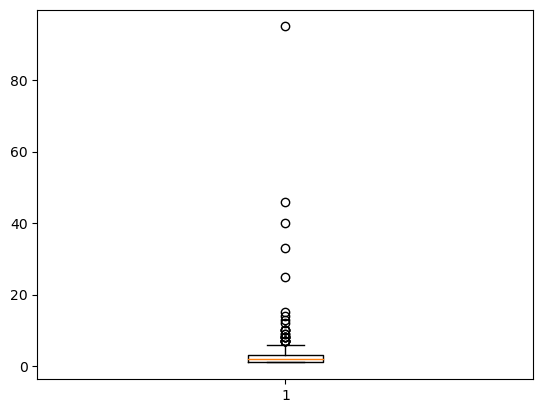

In [58]:
plt.boxplot(fintech_industry["Valuation"])
plt.show()

* From the boxplot, we can see the top5 countries are belong to outliers. In order to visualize the rest of the data properly, we will remove the top5 countries.

In [59]:
fintech_industry_no_outlier = fintech_industry[~fintech_industry["Country"].isin(["India","United States","United Kingdom","Sweden","Germany"])]
fintech_industry_no_outlier

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Years to join
61,Dunamu,9,2021-07-22,Fintech,Seoul,South Korea,Asia,2012,$71M,"Qualcomm Ventures, Woori Investment, Hanwha In...",2021,9
75,Dapper Labs,8,2021-03-30,Fintech,Vancouver,Canada,North America,2018,$607M,"Union Square Ventures, Venrock, Andreessen Hor...",2021,3
92,Toss,7,2018-12-09,Fintech,Seoul,South Korea,Asia,2013,$844M,"Bessemer Venture Partners, Qualcomm Ventures, ...",2018,5
106,Airwallex,6,2019-03-25,Fintech,Melbourne,Australia,Oceania,2015,$802M,"DST Global, Sequoia Capital China, Tencent Hol...",2019,4
108,Mambu,6,2021-01-06,Fintech,Amsterdam,Netherlands,Europe,2011,$448M,"Runa Capital, Acton Capital Partners, Point Ni...",2021,10
109,Mollie,6,2020-09-08,Fintech,Amsterdam,Netherlands,Europe,2004,$928M,Technology Crossover Ventures,2020,16
145,Pleo,5,2021-07-06,Fintech,Copenhagen,Denmark,Europe,2015,$428M,"Creandum, Founders, Kinnevik",2021,6
152,Creditas,5,2020-12-18,Fintech,Sao Paulo,Brazil,South America,2012,$824M,"Kaszek Ventures, Amadeus Capital Partners, Quo...",2020,8
155,C6 Bank,5,2020-12-02,Fintech,Sao Paulo,Brazil,South America,2018,$2B,Credit Suisse,2020,2
163,Qonto,5,2022-01-11,Fintech,Paris,France,Europe,2016,$704M,"Alven Capital, Valar Ventures, Tencent Holdings",2022,6


### Visualize the above countries's valuation

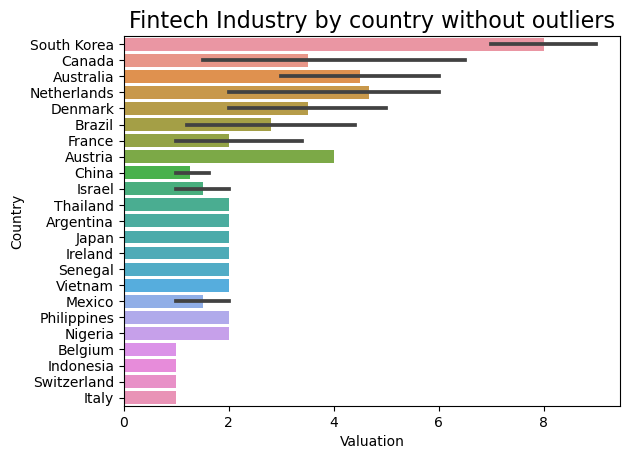

In [60]:
sns.barplot(data=fintech_industry_no_outlier,
           x="Valuation",
           y="Country")
plt.title("Fintech Industry by country without outliers", fontsize=16)
plt.show()

## Considerations

**What are some key takeaways that you learned from this lab?**

- Functions in the `pandas` library can be used for data manipulation in order to reorganize and structure the data.
- Converting strings that contain dates to datetime format allow you to extract individual components from the data, such as month and year.
- Structuring the data in specific ways allows you to observe more trends and zoom in on parts of the data that are interesting to you.
- Functions in the `matplotlib.pyplot` module and the `seaborn` library can be used to create visualizations to gain further insight after structuring the data.

**What findings would you share with others?**

- There are 1074 unicorn companies represented in this dataset.
- 2015 is the year when the most number of unicorn companies were founded. 
- Many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. 
- The box plot created shows that companies that become unicorns in the months of September and October have a smaller median value for how long it took to become unicorns.
- One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.

**What recommendations would you share based on these findings?**

- According to data analysis that was conducted on a dataset of 1074 unicorn companies, companies that joined in the months of `September` and `October` tended to take less time to become unicorns.
- Another finding was that many of the unicorn companies that were founded in 2021 were founded in the **United States** and belong to **"Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries.** So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.
- It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year. 
- The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders. 

**References**

Bhat, M.A. (2022, March).[*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 